Ideas: 
- What's the effect of excluding 30 days prev., 60 days prev. , ...?
-> Corr-Plot of each variable
- Sparsity in prior events
- PCA analysis
-> How much can be explained by 1, 2, 3 dimensions?
- Demographics analysis
-> Comparison with average in the US
- Discussion of "We found this bacterium on the hospital wall" features
- 10, 15, 20 features with the highest correlation with target variables
- 10, 15, 20 features with the lowest correlation with target variables


- Resistance data availability
- Analysis of spread of resistance between uncomplicated and complicated cases

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read data in

In [2]:
features = pd.read_csv('all_uti_features.csv', index_col = 'example_id')
prescrip = pd.read_csv('all_prescriptions.csv', index_col = 'example_id')
resistance = pd.read_csv('all_uti_resist_labels.csv', index_col = 'example_id')

In [3]:
# cip_df = resistance[resistance['CIP'].notna()][['CIP']].join(features)
cip_df = resistance[['CIP']].join(features)

In [4]:
#cip_df = cip_df.drop(cip_df.columns[cip_df.columns.str.contains('selected micro - ', regex=True, na=True)], axis = 1)

### What's the effect of excluding "occuring in 14, 30, 60, 90 Days prev" of sth.?

Would be interesting to see
- How big the change in '1's is for the increasing horizon (on average, and std.)

In [5]:
cip_df.columns[cip_df.columns.str.contains('ALL', regex=True, na=True)]

Index(['micro - prev resistance CFZ ALL', 'micro - prev resistance ERY ALL',
       'micro - prev resistance LVX ALL', 'micro - prev resistance OXA ALL',
       'micro - prev resistance PEN ALL', 'micro - prev resistance TET ALL',
       'micro - prev resistance AMP ALL', 'micro - prev resistance CIP ALL',
       'micro - prev resistance SXT ALL', 'micro - prev resistance DOX ALL',
       ...
       'ab subtype ALL - penicillins', 'ab subtype ALL - cephalosporin_gen1',
       'ab subtype ALL - cephalosporin_gen3',
       'ab subtype ALL - beta_lactam_combo',
       'ab subtype ALL - antistaphylococcal', 'ab subtype ALL - carbapenem',
       'ab subtype ALL - cephalosporin_gen4', 'ab subtype ALL - echinocandin',
       'ab subtype ALL - cephalosporin_gen2', 'ab subtype ALL - polyene'],
      dtype='object', length=113)

In [6]:
base = r'^{}'
expr = '(?=.*{})'

micro - prev resistance CFZ 
Index(['micro - prev resistance CFZ 14'], dtype='object')
Index(['micro - prev resistance CFZ 30'], dtype='object')
Index(['micro - prev resistance CFZ 90'], dtype='object')
Index(['micro - prev resistance CFZ 180'], dtype='object')
micro - prev resistance ERY 
Index([], dtype='object')
Index(['micro - prev resistance ERY 30'], dtype='object')
Index(['micro - prev resistance ERY 90'], dtype='object')
Index(['micro - prev resistance ERY 180'], dtype='object')
micro - prev resistance LVX 
Index(['micro - prev resistance LVX 14'], dtype='object')
Index(['micro - prev resistance LVX 30'], dtype='object')
Index(['micro - prev resistance LVX 90'], dtype='object')
Index(['micro - prev resistance LVX 180'], dtype='object')


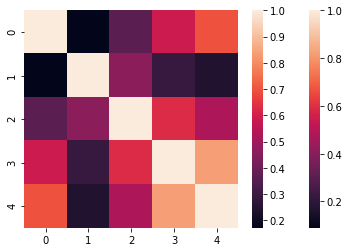

In [7]:
for feature_all in cip_df.columns[cip_df.columns.str.contains('ALL', regex=True, na=True)][0:3]:
    feature = feature_all.split('ALL')[0]
    print(feature)
    
    feature_14 = cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '14'])), regex=True, na=True)]
    print(feature_14)
    feature_30 = cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '30'])), regex=True, na=True)]
    print(feature_30)
    feature_90 = cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '90'])), regex=True, na=True)]
    print(feature_90)
    feature_180 = cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '180'])), regex=True, na=True)]
    print(feature_180)
    
    if feature_14.shape[0] == 0 or feature_30.shape[0] == 0 or feature_90.shape[0] == 0 or feature_180.shape[0] == 0:
        next;
    else:
        sns.heatmap(np.corrcoef(cip_df[[feature_all, feature_14[0], feature_30[0], feature_90[0], feature_180[0]]], rowvar = False))

In [8]:
cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '14'])), regex=True, na=True)][0]

'micro - prev resistance LVX 14'

In [9]:
cip_df.columns[cip_df.columns.str.contains('30', regex=True, na=True)].shape

(119,)

In [10]:
cip_df.columns[cip_df.columns.str.contains('90', regex=True, na=True)].shape

(218,)

In [11]:
cip_df.columns[cip_df.columns.str.contains('180', regex=True, na=True)].shape

(162,)

In [12]:
cip_df.columns[cip_df.columns.str.contains('30', regex=True, na=True)][0].split('30')[0]

'micro - prev resistance ERY '

In [13]:
cip_df.columns[cip_df.columns.str.contains('90', regex=True, na=True)][0].split('90')[0]

'micro - prev resistance AMC '

In [14]:
cip_df.columns[cip_df.columns.str.contains('180', regex=True, na=True)][0].split('180')[0]

'micro - prev resistance LVX '

## Effect of excluding main antibiotics prior resistance

In [97]:
reduced_columns = cip_df.columns[cip_df.columns.str.contains('micro - prev resistance', regex=True, na=True)]

for feature_all in reduced_columns[reduced_columns.str.contains('ALL', regex=True, na=True)]:
    feature = feature_all.split('ALL')[0]
    
    feature_14 = cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '14'])), regex=True, na=True)]
    feature_30 = cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '30'])), regex=True, na=True)]
    feature_90 = cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '90'])), regex=True, na=True)]
    feature_180 = cip_df.columns[cip_df.columns.str.contains(base.format(''.join(expr.format(w) for w in [feature, '180'])), regex=True, na=True)]
    
    if feature_14.shape[0] == 0 or feature_30.shape[0] == 0 or feature_90.shape[0] == 0 or feature_180.shape[0] == 0:
        print(feature)
        next;
    else:
        print(cip_df[[feature_all, feature_14[0], feature_30[0], feature_90[0], feature_180[0]]].describe().loc['mean'])
        #sns.heatmap(np.corrcoef(cip_df[[feature_all, feature_14[0], feature_30[0], feature_90[0], feature_180[0]]], rowvar = False))

micro - prev resistance CFZ ALL    0.377547
micro - prev resistance CFZ 14     0.004859
micro - prev resistance CFZ 30     0.039401
micro - prev resistance CFZ 90     0.112282
micro - prev resistance CFZ 180    0.169261
Name: mean, dtype: float64
micro - prev resistance ERY 
micro - prev resistance LVX ALL    0.209073
micro - prev resistance LVX 14     0.007742
micro - prev resistance LVX 30     0.034679
micro - prev resistance LVX 90     0.083258
micro - prev resistance LVX 180    0.114917
Name: mean, dtype: float64
micro - prev resistance OXA 
micro - prev resistance PEN 
micro - prev resistance TET ALL    0.249808
micro - prev resistance TET 14     0.005244
micro - prev resistance TET 30     0.030222
micro - prev resistance TET 90     0.078510
micro - prev resistance TET 180    0.114215
Name: mean, dtype: float64
micro - prev resistance AMP ALL    0.308609
micro - prev resistance AMP 14     0.006185
micro - prev resistance AMP 30     0.037809
micro - prev resistance AMP 90     0.100

## Sparsity in Prior events

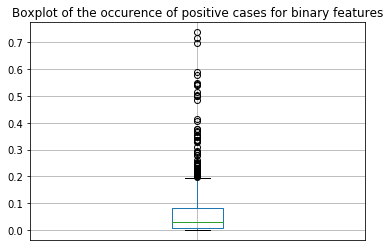

In [100]:
histplot = cip_df[cip_df.columns[cip_df.columns.str.contains('90|30|14|180|ALL', regex=True, na=True)]].describe().T[['mean']].boxplot()
histplot.set_title('Boxplot of the occurence of positive cases for binary features')
histplot.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off)

Text(0.5, 1.0, 'Histogram of the occurence of positive cases for binary features')

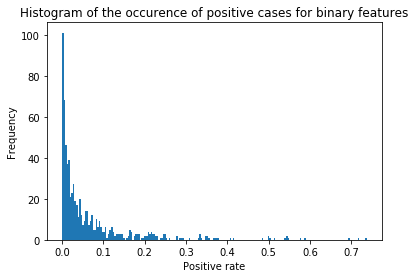

In [74]:
plotplot = cip_df[cip_df.columns[cip_df.columns.str.contains('90|30|14|180|ALL', regex=True, na=True)]].describe().T[['mean']].plot(kind = 'hist', bins = 200, legend = False)
plotplot.set_xlabel('Positive rate')
plotplot.set_title('Histogram of the occurence of positive cases for binary features')

In [17]:
info_df = cip_df[cip_df.columns[cip_df.columns.str.contains('90|30|14|180|ALL', regex=True, na=True)]].describe().T[['mean', 'count']].sort_values(by = 'mean')

In [18]:
info_df[info_df['mean'] >= 0.05]

,mean,count
comorbidity 180 - Rheumatic,0.050059,116902.0
micro - prev resistance VAN ALL,0.050093,116902.0
comorbidity 180 - Paralysis,0.050718,116902.0
comorbidity 14 - Mets,0.051624,116902.0
comorbidity 90 - WeightLoss,0.051838,116902.0
...,...,...
ab class ALL - beta_lactam,0.576509,116902.0
selected micro - colonization pressure ERY 90 - granular level,0.589821,116902.0
procedure 180 - had surgery,0.695993,116902.0
selected micro - colonization pressure ERY 90 - higher level,0.716154,116902.0


## Demographics Analysis

#### Where is the gender variable???

In [19]:
cip_df.columns[cip_df.columns.str.contains('is_', regex=True, na=True)]

Index(['demographics - is_white', 'demographics - is_veteran', 'is_train'], dtype='object')

In [20]:
demographics_df = cip_df[cip_df.columns[cip_df.columns.str.contains('demographics', regex=True, na=True)]]

Text(0.5, 1.0, 'Boxplot of the age of patients')

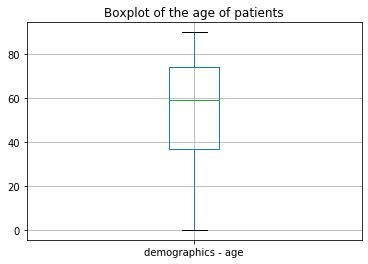

In [63]:
demographics_df[['demographics - age']].boxplot().set_title('Boxplot of the age of patients')

In [22]:
demographics_df[demographics_df['demographics - age'] == 0].shape[0]

887

In [23]:
demographics_df.describe().loc[['mean', 'std', 'min', 'max']]

,demographics - age,demographics - is_white,demographics - is_veteran
mean,55.408034,0.716557,0.055072
std,22.725221,0.450671,0.228121
min,0.000000,0.000000,0.000000
max,90.000000,1.000000,1.000000


## Highest - and lowest correlated features with target variable

#### Follow-up question: Are if-then statements correct? E.g. If there was CIP resistance in the last 90 days, then the patient is still resistant to date?

In [24]:
corr_df = pd.DataFrame(abs(np.corrcoef(cip_df.dropna(), rowvar = False)[0][1:]), index = cip_df.columns[1:], columns = ['Corr'])

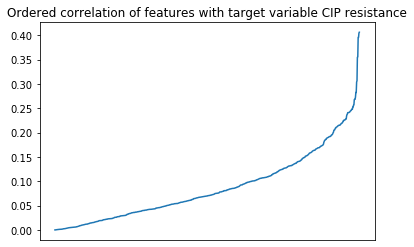

In [90]:
corr_plot = corr_df.sort_values(by = 'Corr').plot(legend = False)
corr_plot.set_title('Ordered correlation of features with target variable CIP resistance')
corr_plot.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off)

In [26]:
corr_df.sort_values(by = 'Corr').iloc[0:30]

,Corr
ab subtype 7 - cephalosporin_gen1,0.000003
medication 14 - penicillin,0.000029
ab subtype 7 - penicillins,0.000091
medication 180 - cefadroxil,0.000353
medication 30 - amoxicillin,0.000402
medication 14 - clarithromycin,0.000439
medication 7 - clarithromycin,0.000637
selected micro - colonization pressure SAM 90 - overall,0.000756
medication 7 - amoxicillin,0.000809
medication 30 - cefoxitin,0.000945


In [27]:
corr_df.sort_values(by = 'Corr').iloc[corr_df.shape[0]-30:]

,Corr
medication 180 - vancomycin,0.241039
micro - prev resistance TET ALL,0.241039
micro - prev resistance AMP ALL,0.241222
medication 180 - ciprofloxacin,0.241933
micro - prev resistance ATM ALL,0.242160
medication 180 - levofloxacin,0.243543
ab subtype ALL - cephalosporin_gen3,0.244360
micro - prev resistance CRO ALL,0.245283
micro - prev resistance SXT ALL,0.245563
ab class ALL - fluoroquinolone,0.247856


#### Follow-up question

In [122]:
followup_df = cip_df[['micro - prev resistance CIP ALL', 'micro - prev resistance CIP 180', 'micro - prev resistance CIP 90', 'micro - prev resistance CIP 30', 'micro - prev resistance CIP 14', 'CIP']]
followup_df[((followup_df['micro - prev resistance CIP 14'] == 1) & (followup_df['CIP'] == 0))]

,micro - prev resistance CIP ALL,micro - prev resistance CIP 180,micro - prev resistance CIP 90,micro - prev resistance CIP 30,micro - prev resistance CIP 14,CIP
example_id,,,,,,
964,1.0,1.0,1.0,1.0,1.0,0.0
1053,1.0,1.0,1.0,1.0,1.0,0.0
1355,1.0,1.0,1.0,1.0,1.0,0.0
5138,1.0,1.0,1.0,1.0,1.0,0.0
7084,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
111450,1.0,1.0,1.0,1.0,1.0,0.0
111745,1.0,1.0,1.0,1.0,1.0,0.0
115271,1.0,1.0,1.0,1.0,1.0,0.0


-> How can the resistance vanish?

## Explanations through PCA - How much can be explained in low dimensions?

## Resistance data availability

In [55]:
data_availability_df = pd.DataFrame()

In [56]:
data_availability_df['available'] = resistance.count()

In [57]:
data_availability_df['positives'] = resistance.sum()

In [58]:
data_availability_df['negatives'] = data_availability_df['available'] - data_availability_df['positives']

In [59]:
data_availability_df['unavailable'] = resistance.shape[0] - data_availability_df['available']

In [79]:
data_availability_df

,available,positives,negatives,unavailable
NIT,111859,24333.0,87526.0,5043
SXT,103654,26043.0,77611.0,13248
CIP,110761,23509.0,87252.0,6141
LVX,115925,25607.0,90318.0,977
is_train,116902,80962.0,35940.0,0
uncomplicated,116902,15806.0,101096.0,0


In [81]:
unc_data_availability_df = pd.DataFrame()
unc_data_availability_df['available'] = resistance[resistance['uncomplicated'] == 1].count()
unc_data_availability_df['positives'] = resistance[resistance['uncomplicated'] == 1].sum()
unc_data_availability_df['negatives'] = unc_data_availability_df['available'] - unc_data_availability_df['positives']
unc_data_availability_df['unavailable'] = resistance[resistance['uncomplicated'] == 1].shape[0] - unc_data_availability_df['available']
unc_data_availability_df

,available,positives,negatives,unavailable
NIT,15806,1756.0,14050.0,0
SXT,15806,3095.0,12711.0,0
CIP,15806,885.0,14921.0,0
LVX,15806,866.0,14940.0,0
is_train,15806,11865.0,3941.0,0
uncomplicated,15806,15806.0,0.0,0


Text(0.5, 1.0, 'Data Availability of Resistance Tests')

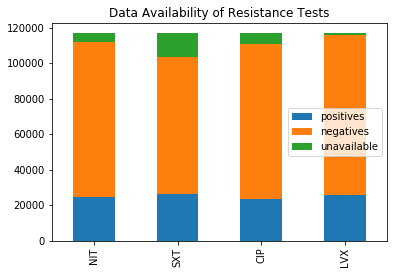

In [61]:
data_availability_df.iloc[0:4, 1:].plot(kind = 'bar', stacked = True).set_title('Data Availability of Resistance Tests')

Text(0.5, 1.0, 'Data Availability of Resistance Tests for Uncomplicated cases')

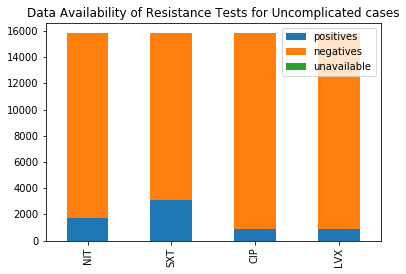

In [83]:
unc_data_availability_df.iloc[0:4, 1:].plot(kind = 'bar', stacked = True).set_title('Data Availability of Resistance Tests for Uncomplicated cases')